In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [4]:
# loading data from disk.
model_archs = ["bert-base-uncased", "roberta-base", "gpt2"]
layers_results = {}
for model_arch in model_archs:
    csv_mean = f"./csv-results/{model_arch}-layers-mean.csv"
    csv_std = f"./csv-results/{model_arch}-layers-std.csv"
    mean_df = pd.read_csv(csv_mean).sort_values(by=['interchange_layer'])
    std_df = pd.read_csv(csv_std).sort_values(by=['interchange_layer'])
    
    ks_mean = {
        "ICaCE-L2" : np.array(mean_df["ICaCE-L2"].tolist()),
        "ICaCE-cosine" : np.array(mean_df["ICaCE-cosine"].tolist()),
        "ICaCE-normdiff" : np.array(mean_df["ICaCE-normdiff"].tolist()),
        "macro-f1" : np.array(mean_df["macro-f1"].tolist())
    }
    
    ks_std = {
        "ICaCE-L2" : np.array(std_df["ICaCE-L2"].tolist()),
        "ICaCE-cosine" : np.array(std_df["ICaCE-cosine"].tolist()),
        "ICaCE-normdiff" : np.array(std_df["ICaCE-normdiff"].tolist()),
        "macro-f1" : np.array(std_df["macro-f1"].tolist())
    }
    
    layers_results[model_arch] = {
        "mean" : ks_mean,
        "std" : ks_std
    }
    
    layers = mean_df["interchange_layer"].tolist()

model_archs = ["lstm", "bert-base-uncased", "roberta-base", "gpt2"]
hdims_results = {}
for model_arch in model_archs:
    csv_mean = f"./csv-results/{model_arch}-hdims-mean.csv"
    csv_std = f"./csv-results/{model_arch}-hdims-std.csv"
    mean_df = pd.read_csv(csv_mean).sort_values(by=['h_dim'])
    std_df = pd.read_csv(csv_std).sort_values(by=['h_dim'])
    
    ks_mean = {
        "ICaCE-L2" : np.array(mean_df["ICaCE-L2"].tolist()),
        "ICaCE-cosine" : np.array(mean_df["ICaCE-cosine"].tolist()),
        "ICaCE-normdiff" : np.array(mean_df["ICaCE-normdiff"].tolist()),
        "macro-f1" : np.array(mean_df["macro-f1"].tolist())
    }
    
    ks_std = {
        "ICaCE-L2" : np.array(std_df["ICaCE-L2"].tolist()),
        "ICaCE-cosine" : np.array(std_df["ICaCE-cosine"].tolist()),
        "ICaCE-normdiff" : np.array(std_df["ICaCE-normdiff"].tolist()),
        "macro-f1" : np.array(std_df["macro-f1"].tolist())
    }
    
    hdims_results[model_arch] = {
        "mean" : ks_mean,
        "std" : ks_std
    }
    
    hdims = mean_df["h_dim"].tolist()
    if model_arch == "lstm":
        hdims_lstm = mean_df["h_dim"].tolist()

In [10]:
def make_single_plot(ax, x, y, y_std, color, marker, ylims, label=None):
    ax.plot(x, y, color=color, marker=marker, markersize=8, label=label)
    ax.fill_between(x, y-y_std, y+y_std, color=color, alpha=0.1)
    ax.set_ylim(ylims[0], ylims[1])
    return ax

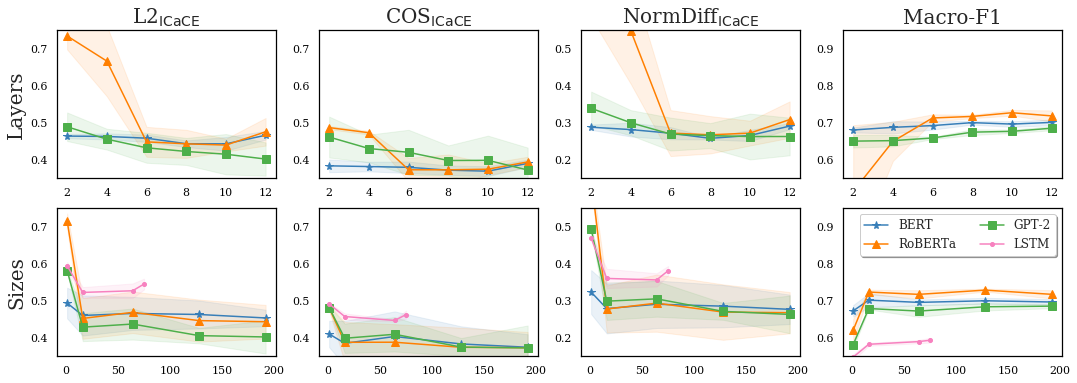

In [44]:
plt.rcParams["font.family"] = "DejaVu Serif"
font = {'family' : 'DejaVu Serif',
        'size'   : 20}
plt.rc('font', **font)
items = ["ICaCE-L2", "ICaCE-cosine", "ICaCE-normdiff", "macro-f1"]

with plt.rc_context({
    'axes.edgecolor':'black', 'xtick.color':'black', 
    'ytick.color':'black', 'axes.facecolor':'white', 
}):
    fig, axs = plt.subplots(2, 4, figsize=(18, 6))
    axs[0,0].set_title(r'L2$_{\rm ICaCE}$', fontsize=20)
    axs[0,1].set_title(r'COS$_{\rm ICaCE}$', fontsize=20)
    axs[0,2].set_title(r'NormDiff$_{\rm ICaCE}$', fontsize=20)
    axs[0,3].set_title(r'Macro-F1', fontsize=20)
    
    # layers
    ylims_all = [
        [0.35, 0.75],
        [0.35, 0.75],
        [0.15, 0.55],
        [0.55, 0.95]
    ]
    
    # '#377eb8', '#ff7f00', '#4daf4a', '#f781bf'
    
    for i in range(0, 4):
        make_single_plot(
            axs[0,i], layers, 
            layers_results["bert-base-uncased"]["mean"][items[i]], 
            layers_results["bert-base-uncased"]["std"][items[i]], 
            color='#377eb8', marker="*", ylims=ylims_all[i], label=None
        )
    for i in range(0, 4):
        make_single_plot(
            axs[0,i], layers, 
            layers_results["roberta-base"]["mean"][items[i]], 
            layers_results["roberta-base"]["std"][items[i]], 
            color='#ff7f00', marker="^", ylims=ylims_all[i], label=None
        )
    for i in range(0, 4):
        make_single_plot(
            axs[0,i], layers, 
            layers_results["gpt2"]["mean"][items[i]], 
            layers_results["gpt2"]["std"][items[i]], 
            color='#4daf4a', marker="s", ylims=ylims_all[i], label=None
        )
    
    # hdims
    for i in range(0, 4):
        make_single_plot(
            axs[1,i], hdims, 
            hdims_results["bert-base-uncased"]["mean"][items[i]], 
            hdims_results["bert-base-uncased"]["std"][items[i]], 
            color="#377eb8", marker="*", ylims=ylims_all[i], label="BERT" if i == 3 else None
        )
    for i in range(0, 4):
        make_single_plot(
            axs[1,i], hdims, 
            hdims_results["roberta-base"]["mean"][items[i]], 
            hdims_results["roberta-base"]["std"][items[i]], 
            color="#ff7f00", marker="^", ylims=ylims_all[i], label="RoBERTa" if i == 3 else None
        )
    for i in range(0, 4):
        make_single_plot(
            axs[1,i], hdims, 
            hdims_results["gpt2"]["mean"][items[i]], 
            hdims_results["gpt2"]["std"][items[i]], 
            color="#4daf4a", marker="s", ylims=ylims_all[i], label="GPT-2" if i == 3 else None
        )
    for i in range(0, 4):
        make_single_plot(
            axs[1,i], hdims_lstm, 
            hdims_results["lstm"]["mean"][items[i]], 
            hdims_results["lstm"]["std"][items[i]], 
            color="#f781bf", marker=".", ylims=ylims_all[i], label="LSTM" if i == 3 else None
        )
        
    axs[0,0].set_ylabel("Layers", fontsize=20)
    axs[1,0].set_ylabel("Sizes", fontsize=20)
    
    axs[1,3].legend(loc='upper right',
                 ncol=2, fancybox=True, shadow=True, fontsize=12, facecolor="white")
    plt.subplots_adjust(wspace=0.2, 
                        hspace=0.2)
    plt.savefig("./figures/site-and-size-experiments.png",dpi=200, bbox_inches='tight')